# Práctica de evaluación Machine Learning UCM
## Pump it Up: Data Mining the Water Table
### Cristian David Rodriguez Montes - AX285146

- amount_tsh - Total static head (amount water available to waterpoint)

- date_recorded - The date the row was entered 

- funder - Who funded the well 

- gps_height - Altitude of the well 

- installer - Organization that installed the well 

- longitude - GPS coordinate 

- latitude - GPS coordinate 

- wpt_name - Name of the waterpoint if there is one 

- num_private - 

- basin - Geographic water basin 

- subvillage - Geographic location 

- region - Geographic location 

- region_code - Geographic location (coded) 

- district_code - Geographic location (coded) 

- lga - Geographic location 

- ward - Geographic location 

- population - Population around the well 

- public_meeting - True/False

- recorded_by - Group entering this row of data

- scheme_management - Who operates the waterpoint

- scheme_name - Who operates the waterpoint

- permit - If the waterpoint is permitted

- construction_year - Year the waterpoint was constructed

- extraction_type - The kind of extraction the waterpoint uses

- extraction_type_group - The kind of extraction the waterpoint uses

- extraction_type_class - The kind of extraction the waterpoint uses

- management - How the waterpoint is managed

- management_group - How the waterpoint is managed

- payment - What the water costs

- payment_type - What the water costs

- water_quality - The quality of the water

- quality_group - The quality of the water

- quantity - The quantity of water

- quantity_group - The quantity of water

- source - The source of the water

- source_type - The source of the water

- source_class - The source of the water

- waterpoint_type - The kind of waterpoint

- waterpoint_type_group - The kind of waterpoint

### The labels in this dataset are simple. There are three possible values:


- functional - the waterpoint is operational and there are no repairs needed

- functional needs repair - the waterpoint is operational, but needs repairs

- non functional - the waterpoint is not operational

#### Se importan las librerias necesarias para el analisis

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer, LabelBinarizer
from itertools import cycle
from sklearn.metrics import RocCurveDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import yeojohnson
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train_values = pd.read_csv('training_set_values.csv')
df_train_labels = pd.read_csv('training_set_labels.csv')
X_test = pd.read_csv('test_set_values.csv')

df = pd.merge(df_train_values, df_train_labels, how='inner', on='id')
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


Las unicas variables que deben ser númericas (ya sean en integers o floats):

amount_tsh - gps_height - latitude - population - construction_year.


El resto de variables corresponden a categorias (exceptuando date_recorded)

In [3]:
df_original = df.copy() 
X_test_original = X_test.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [5]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13980 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

# Primera Iteración

8 variables cuentan con valores nulos

En este caso vemos que la variable scheme_name cuenta con un 48% de valores nulos, por lo que no seria apropiado intentar hacer algun tipo de imputación, por lo que se va eliminar esta variable.

Las otras variables que cuentan con nulos, ninguna pasa del 10%, por lo que se revisara para algun metodo de imputación

In [6]:
df.isnull().sum().sort_values(ascending=False) / len(df) * 100

scheme_name              48.501684
scheme_management         6.528620
installer                 6.153199
funder                    6.122896
public_meeting            5.612795
permit                    5.144781
subvillage                0.624579
wpt_name                  0.003367
id                        0.000000
latitude                  0.000000
longitude                 0.000000
date_recorded             0.000000
gps_height                0.000000
amount_tsh                0.000000
num_private               0.000000
basin                     0.000000
region                    0.000000
ward                      0.000000
lga                       0.000000
district_code             0.000000
region_code               0.000000
recorded_by               0.000000
population                0.000000
construction_year         0.000000
extraction_type           0.000000
extraction_type_group     0.000000
extraction_type_class     0.000000
management                0.000000
management_group    

In [7]:
df =  df.drop(columns=['scheme_name'], axis=1)
X_test =  X_test.drop(columns=['scheme_name'], axis=1)

Con un ciclo for manual se itera sobre las categorias y si hay nulos, se rellena con la moda, notese tambien que el X_test se rellena con la moda del dataset del training

Se genera un proceso similar para las variables numericas pero estas se rellenan con el promedio

In [8]:
df['status_group'].replace(('functional','non functional','functional needs repair'),
                            (1,2,3),inplace=True)

var_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()
var_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
var_numericas.remove('status_group')

In [9]:
for i in var_categoricas:
    if df[i].isnull().any() or X_test[i].isnull().any():
        df[i] = df[i].fillna(df[i].mode()[0])
        X_test[i] = X_test[i].fillna(df[i].mode()[0])

for i in var_numericas:
    if df[i].isnull().any() or X_test[i].isnull().any():
        df[i] = df[i].fillna(df[i].mean())
        X_test[i] = X_test[i].fillna(df[i].mean())

df.isnull().sum().sort_values(ascending=False) / len(df) * 100

id                       0.0
amount_tsh               0.0
date_recorded            0.0
funder                   0.0
gps_height               0.0
installer                0.0
longitude                0.0
latitude                 0.0
wpt_name                 0.0
num_private              0.0
basin                    0.0
subvillage               0.0
region                   0.0
region_code              0.0
district_code            0.0
lga                      0.0
ward                     0.0
population               0.0
public_meeting           0.0
recorded_by              0.0
scheme_management        0.0
permit                   0.0
construction_year        0.0
extraction_type          0.0
extraction_type_group    0.0
extraction_type_class    0.0
management               0.0
management_group         0.0
payment                  0.0
payment_type             0.0
water_quality            0.0
quality_group            0.0
quantity                 0.0
quantity_group           0.0
source        

In [11]:
df.describe(exclude=np.number)

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1896,2145,37399,9,19287,21,125,2092,2,...,7,8,6,5,5,10,7,3,7,6
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,572,12721,21057,3565,10248,879,5294,2503,307,54345,...,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


Las variables recorded_by y date_recorded se eliminaran ya que segun la descripción del dataset, corresponden a quien inserto los valores (además que el recorded_by solo tiene 1 valor unico)

In [12]:
df =  df.drop(columns=['recorded_by', 'date_recorded'], axis=1)
X_test =  X_test.drop(columns=['recorded_by', 'date_recorded'], axis=1)

Se nota la presencia de variables que pueden resultar siendo muy similares, entre si. Con el fin de disminuir la dimensionalidad de la base, se procedera a eliminar algunas de estas variables, buscando un punto en donde en las variables resultantes no quede demasiada cardinalidad, pero que tampoco queden demasiado agrupadas.

- extraction_type - extraction_type_group - extraction_type_class: Nos quedaremos con la variable extraction_type_class, ya que las otras dos cuentan con demasiadas categorias, en donde se puede notar en la función .value_counts(normalize=1) que llega un punto en donde varias de esas categorias no cuentan con muchos registros.

In [13]:
for i in df.select_dtypes(include=['object', 'category']).columns.tolist():
    if i.startswith('extraction'):
        print(f'Variable {i}: {df[i].value_counts(normalize=1)}')

Variable extraction_type: extraction_type
gravity                      0.450842
nira/tanira                  0.137273
other                        0.108249
submersible                  0.080202
swn 80                       0.061785
mono                         0.048232
india mark ii                0.040404
afridev                      0.029798
ksb                          0.023822
other - rope pump            0.007593
other - swn 81               0.003855
windmill                     0.001970
india mark iii               0.001650
cemo                         0.001515
other - play pump            0.001431
walimi                       0.000808
climax                       0.000539
other - mkulima/shinyanga    0.000034
Name: proportion, dtype: float64
Variable extraction_type_group: extraction_type_group
gravity            0.450842
nira/tanira        0.137273
other              0.108249
submersible        0.104024
swn 80             0.061785
mono               0.048232
india mark ii      

- payment - payment_type: Estas dos variables si bien cambian ligeramente en los nombres de sus categorias, son practicamente iguales, refieren a lo mismo y la frecuencia de cada categoria es identica. Nos quedamos con payment_type, teniendo presente que igual es indiferente tomar una u otra.


In [14]:
for i in df.select_dtypes(include=['object', 'category']).columns.tolist():
    if i.startswith('payment'):
        print(f'Variable {i}: {df[i].value_counts(normalize=1)}')

Variable payment: payment
never pay                0.426734
pay per bucket           0.151263
pay monthly              0.139731
unknown                  0.137323
pay when scheme fails    0.065892
pay annually             0.061313
other                    0.017744
Name: proportion, dtype: float64
Variable payment_type: payment_type
never pay     0.426734
per bucket    0.151263
monthly       0.139731
unknown       0.137323
on failure    0.065892
annually      0.061313
other         0.017744
Name: proportion, dtype: float64


- water_quality - quality_group: Nos quedamos con quality_group, ya que la otra tiene mayor cardinalidad e incluso tiene categorias con apenas 0.03% de participación en la base.

In [15]:
for i in df.select_dtypes(include=['object', 'category']).columns.tolist():
    if 'quality' in i:
        print(f'Variable {i}: {df[i].value_counts(normalize=1)}')

Variable water_quality: water_quality
soft                  0.855522
salty                 0.081751
unknown               0.031582
milky                 0.013535
coloured              0.008249
salty abandoned       0.005707
fluoride              0.003367
fluoride abandoned    0.000286
Name: proportion, dtype: float64
Variable quality_group: quality_group
good        0.855522
salty       0.087458
unknown     0.031582
milky       0.013535
colored     0.008249
fluoride    0.003653
Name: proportion, dtype: float64


- quantity - quantity_group: Es un caso similar al de las variables payment, aunque en esta incluso el nombre de las categorias son exactamente iguales, y las frecuencias son iguales, nos quedamos con quantity_group, pero igual es indiferente.

In [16]:
for i in df.select_dtypes(include=['object', 'category']).columns.tolist():
    if i.startswith('quantity'):
        print(f'Variable {i}: {df[i].value_counts(normalize=1)}')

Variable quantity: quantity
enough          0.558687
insufficient    0.254697
dry             0.105152
seasonal        0.068182
unknown         0.013283
Name: proportion, dtype: float64
Variable quantity_group: quantity_group
enough          0.558687
insufficient    0.254697
dry             0.105152
seasonal        0.068182
unknown         0.013283
Name: proportion, dtype: float64


- source - source_type - source_class: En el caso de estas variables, entre las variables source y source_type, nos quedamos con source_type, ya que esta ultima cuenta con menor cardinalidad que la otra (en source incluso vemos categorias con muy baja participación) y entre la variable source_type y source_class, se hizo una validación con un tabla cruzada, y vemos que por ejemplo de las categorias de  source_class se da:
    - groundwater: Aqui pertenecen totalmente borehole, shallow well, spring.
    - surface: dam, rainwater harvesting, river/lake.

En este caso nos seguiremos quedando con source_type, ya que la de source_class es demasiado amplia.

In [17]:
for i in df.select_dtypes(include=['object', 'category']).columns.tolist():
    if i.startswith('source'):
        print(f'Variable {i}: {df[i].value_counts(normalize=1)}')

Variable source: source
spring                  0.286549
shallow well            0.283232
machine dbh             0.186448
river                   0.161818
rainwater harvesting    0.038636
hand dtw                0.014714
lake                    0.012879
dam                     0.011044
other                   0.003569
unknown                 0.001111
Name: proportion, dtype: float64
Variable source_type: source_type
spring                  0.286549
shallow well            0.283232
borehole                0.201162
river/lake              0.174697
rainwater harvesting    0.038636
dam                     0.011044
other                   0.004680
Name: proportion, dtype: float64
Variable source_class: source_class
groundwater    0.770943
surface        0.224377
unknown        0.004680
Name: proportion, dtype: float64


In [18]:
pd.crosstab(df['source_class'],df['source_type'],margins=True, normalize=1)

source_type,borehole,dam,other,rainwater harvesting,river/lake,shallow well,spring,All
source_class,,,,,,,,
groundwater,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.770943
surface,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.224377
unknown,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.004680


- waterpoint_type - waterpoint_type_group: En este caso, si bien la variable waterpoint_type tiene mayor cardinalidad, por la categoria extra que agrega, nos quedaremos con esta variable, ya que dicha categoria extra concentra un 10% de participación, por lo que segmenta mejor la base.

In [19]:
for i in df.select_dtypes(include=['object', 'category']).columns.tolist():
    if i.startswith('waterpoint'):
        print(f'Variable {i}: {df[i].value_counts(normalize=1)}')

Variable waterpoint_type: waterpoint_type
communal standpipe             0.480168
hand pump                      0.294411
other                          0.107407
communal standpipe multiple    0.102744
improved spring                0.013199
cattle trough                  0.001953
dam                            0.000118
Name: proportion, dtype: float64
Variable waterpoint_type_group: waterpoint_type_group
communal standpipe    0.582912
hand pump             0.294411
other                 0.107407
improved spring       0.013199
cattle trough         0.001953
dam                   0.000118
Name: proportion, dtype: float64


- scheme_management - management - management_group: Nos quedaremos con las variables scheme_management y management_group. En este caso management y scheme_management son bastante similares, pero management tiene mayor cardinalidad, por lo que se eliminara, y tambien nos quedamos management_group, ya que al hacer la tabla cruzada entre esta y scheme_management, las categorias no pertenecen 100% una a la otra como paso con las de source, por lo que la mantendremos.

In [20]:
for i in df.select_dtypes(include=['object', 'category']).columns.tolist():
    if 'management' in i:
        print(f'Variable {i}: {df[i].value_counts(normalize=1)}')

Variable scheme_management: scheme_management
VWC                 0.684697
WUG                 0.087643
Water authority     0.053081
WUA                 0.048535
Water Board         0.046263
Parastatal          0.028283
Private operator    0.017896
Company             0.017862
Other               0.012896
SWC                 0.001633
Trust               0.001212
Name: proportion, dtype: float64
Variable management: management
vwc                 0.681936
wug                 0.109680
water board         0.049377
wua                 0.042677
private operator    0.033182
parastatal          0.029764
water authority     0.015219
other               0.014209
company             0.011532
unknown             0.009444
other - school      0.001667
trust               0.001313
Name: proportion, dtype: float64
Variable management_group: management_group
user-group    0.883670
commercial    0.061246
parastatal    0.029764
other         0.015875
unknown       0.009444
Name: proportion, dtype: float

In [21]:
pd.crosstab(df['management_group'],df['scheme_management'],margins=True, normalize=1)

scheme_management,Company,Other,Parastatal,Private operator,SWC,Trust,VWC,WUA,WUG,Water Board,Water authority,All
management_group,,,,,,,,,,,,
commercial,0.846371,0.109661,0.035714,0.913452,0.000000,0.888889,0.007253,0.067985,0.002113,0.002183,0.333968,0.061246
other,0.001885,0.677546,0.000000,0.003763,0.896907,0.000000,0.006073,0.000694,0.002881,0.008006,0.014272,0.015875
parastatal,0.023563,0.001305,0.933333,0.002822,0.000000,0.013889,0.003295,0.010059,0.001153,0.000364,0.000000,0.029764
unknown,0.000000,0.010444,0.002381,0.000000,0.000000,0.000000,0.013376,0.000347,0.000768,0.000000,0.000000,0.009444
user-group,0.128181,0.201044,0.028571,0.079962,0.103093,0.097222,0.970003,0.920916,0.993085,0.989447,0.651760,0.883670


Variables a eliminar:
- extraction_type
- extraction_type_group
- payment
- water_quality
- quantity
- source_class
- source
- waterpoint_type_group 
- management

In [22]:
df =  df.drop(columns=['extraction_type', 'extraction_type_group','payment', 'water_quality','quantity', 'source_class','source', 'waterpoint_type_group', 'management'], axis=1)
X_test =  X_test.drop(columns=['extraction_type', 'extraction_type_group','payment', 'water_quality','quantity', 'source_class','source', 'waterpoint_type_group', 'management'], axis=1)

In [23]:
df

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_type,waterpoint_type,status_group
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,False,1999,gravity,user-group,annually,good,enough,spring,communal standpipe,1
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,True,2010,gravity,user-group,never pay,good,insufficient,rainwater harvesting,communal standpipe,1
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,True,2009,gravity,user-group,per bucket,good,enough,dam,communal standpipe multiple,1
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,True,1986,submersible,user-group,never pay,good,dry,borehole,communal standpipe multiple,2
4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,True,0,gravity,other,never pay,good,seasonal,rainwater harvesting,communal standpipe,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,True,1999,gravity,user-group,per bucket,good,enough,spring,communal standpipe,1
59396,27263,4700.0,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,True,1996,gravity,user-group,annually,good,enough,river/lake,communal standpipe,1
59397,37057,0.0,Government Of Tanzania,0,DWE,34.017087,-8.750434,Mashine,0,Rufiji,...,False,0,handpump,user-group,monthly,fluoride,enough,borehole,hand pump,1
59398,31282,0.0,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,...,True,0,handpump,user-group,never pay,good,insufficient,shallow well,hand pump,1


In [24]:
df.describe(exclude=np.number)

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,scheme_management,permit,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_type,waterpoint_type
count,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,1896,2145,37399,9,19287,21,125,2092,2,11,2,7,5,7,6,5,7,7
top,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,VWC,True,gravity,user-group,never pay,good,enough,spring,communal standpipe
freq,12721,21057,3565,10248,879,5294,2503,307,54345,40671,41908,26780,52490,25348,50818,33186,17021,28522


Recordar que las variables public_meeting y permit deben ser boleanos. Los vamos a pasar a 1 y 0.

In [25]:
print(df['public_meeting'].value_counts(normalize=1))
print(df['permit'].value_counts(normalize=1))

public_meeting
True     0.914899
False    0.085101
Name: proportion, dtype: float64
permit
True     0.705522
False    0.294478
Name: proportion, dtype: float64


In [26]:
df['public_meeting'] = df['public_meeting'].replace({True: 1, False: 0})
df['permit'] = df['permit'].replace({True: 1, False: 0})

X_test['public_meeting'] = X_test['public_meeting'].replace({True: 1, False: 0})
X_test['permit'] = X_test['permit'].replace({True: 1, False: 0})

Con la función de la celda de abajo, tenemos que para las variables categoricas, con mas de 10 categorias, se hace un proceso de Frequency Encoding, en donde simplemente se reemplaza cada categoria por su frecuencia de aparición. Y para las variables que tienen igual o menos a 10 categorias, se les pasa por el proceso de LabelEncoder, en donde se le asignan indices numericos a cada categoria.

In [27]:
le = LabelEncoder()

var_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()

for i in var_categoricas:
    if df[i].nunique() > 10:
        frecuencias = df[i].value_counts().to_dict()
        df[f'{i}_encoded'] = df[i].map(frecuencias)
        X_test[f'{i}_encoded'] = X_test[i].map(frecuencias)
    else:
        le.fit(df[i])
        df[f'{i}_encoded'] = le.transform(df[i])
        X_test[f'{i}_encoded'] = le.transform(X_test[i])

    df = df.drop(columns=[i], axis=1)
    X_test = X_test.drop(columns=[i], axis=1)


Se revisa el balanceo de datos de la variable objetivo.
El 54% son de functional
38% son de non functional
y solo 7% son de functional needs repair

In [28]:
df['status_group'].value_counts(normalize=1)

status_group
1    0.543081
2    0.384242
3    0.072677
Name: proportion, dtype: float64

In [29]:
X_train, X_test_1, y_train, y_test = train_test_split(df.drop('status_group',axis=1),
                                                    df['status_group'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = df['status_group'])

In [30]:
model = RandomForestClassifier().fit(X_train,y_train)
y_pred = model.predict(X_test_1)
y_score = model.predict_proba(X_test_1)

Se crea la siguiente función, basandose en los notebooks que nos compartieron y en la documentación de sklearn https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html 

In [31]:
n_classes = len(np.unique(y_train))

def sacar_metricas(y_test, y_pred, y_train, y_score, n_classes):
    print('Matriz de Confusión')
    print(confusion_matrix(y_test, y_pred))
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred, average='weighted'))
    print('Recall:', recall_score(y_test, y_pred, average='weighted'))
    print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))

    label_binarizer = LabelBinarizer().fit(y_train)
    y_onehot_test = label_binarizer.transform(y_test)

    target_names = {0: 'functional', 1: 'non functional', 2: 'functional needs repair'}

    fig, ax = plt.subplots(figsize=(6, 6))

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for class_id, color in zip(range(n_classes), colors):
        RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_score[:, class_id],
            name=f"ROC curve for {target_names[class_id]}",
            curve_kwargs=dict(color=color),
            ax=ax,
            plot_chance_level=(class_id == 2),
            despine=True,
        )

    _ = ax.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title="Curvas ROC (Multiclase)",
    )
    roc_auc_macro = roc_auc_score(y_onehot_test, y_score, multi_class='ovr', average='macro')
    print(f"AUC Macro Promedio: {roc_auc_macro:.4f}")


Se obtienen muy buenos resultados para todas las metricas, en el caso de los valores AUC, la categoria con menor valor resulto siendo la de functional needs repair, esto seguramente debido a que las clases se encuentran desbalanceadas (esta categoria solo participa en ek 7% de los datos.) 

Matriz de Confusión
[[5807  495  150]
 [ 972 3532   61]
 [ 458  131  274]]
Accuracy: 0.8091750841750842
Precision: 0.8032313130398597
Recall: 0.8091750841750842
F1 Score: 0.8014837175448539
AUC Macro Promedio: 0.8966


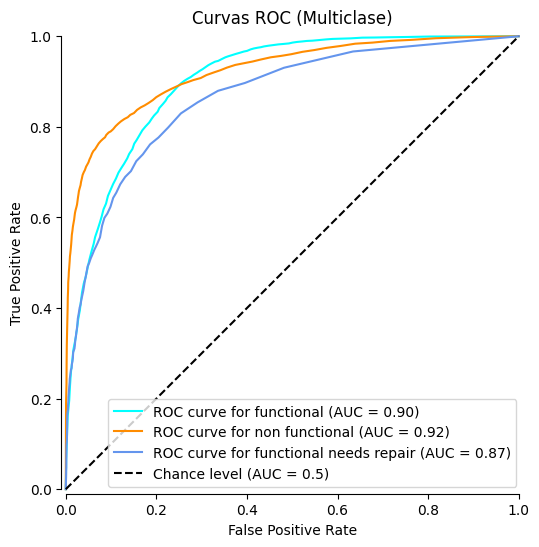

In [32]:
sacar_metricas(y_test, y_pred, y_train, y_score, n_classes)

In [33]:
y_pred = model.predict(X_test)

In [34]:
y_pred_df = pd.DataFrame(y_pred, columns=['status_group'], index=X_test.index)
X_test_with_preds = pd.concat([X_test, y_pred_df], axis=1)


In [35]:
X_test_with_preds

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,public_meeting,...,ward_encoded,scheme_management_encoded,extraction_type_class_encoded,management_group_encoded,payment_type_encoded,quality_group_encoded,quantity_group_encoded,source_type_encoded,waterpoint_type_encoded,status_group
0,50785,0.0,1996,35.290799,-4.059696,0,21,3,321,1,...,25.0,1680,3,2,2,2,3,3,6,2
1,51630,0.0,1569,36.656709,-3.309214,0,2,2,300,1,...,79.0,40671,0,4,2,2,2,6,1,1
2,17168,0.0,1567,34.767863,-5.004344,0,13,2,500,1,...,44.0,40671,3,4,2,2,2,3,6,1
3,45559,0.0,267,38.058046,-9.418672,0,80,43,250,1,...,5.0,40671,3,4,6,2,0,5,6,2
4,49871,500.0,1260,35.006123,-10.950412,0,10,3,60,1,...,53.0,2748,0,4,1,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,34,38.852669,-6.582841,0,6,1,20,1,...,106.0,40671,2,4,2,2,1,4,1,2
14846,18990,1000.0,0,37.451633,-5.350428,0,4,7,2960,1,...,30.0,40671,1,4,0,4,2,5,4,1
14847,28749,0.0,1476,34.739804,-4.585587,0,13,2,200,1,...,35.0,40671,0,4,2,2,2,1,1,1
14848,33492,0.0,998,35.432732,-10.584159,0,10,2,150,1,...,130.0,40671,0,4,2,2,2,4,1,1


In [36]:
X_test_with_preds['status_group'].replace((1,2,3),('functional','non functional','functional needs repair'),inplace=True)


In [37]:
X_test_with_preds[['id', 'status_group']]

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


Con el proceso anterior, obtuve este scoring

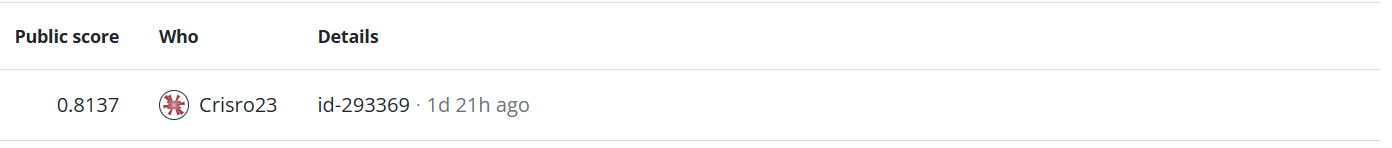

# Segunda Iteración

Partimos nuevamente del dataset original

In [38]:
df = df_original.copy()
X_test = X_test_original.copy()

Directamente se van a hacer unas operaciones basicas que considero que deberian ser reproducibles para cada iteración. Como eliminar las variables recorded_by, date_recorded, scheme_name y id (anteriormente no se elimino la variable id y adicional a ello se paso al modelo anterior, lo ideal seria eliminarlo ya que no deberia representar ningun poder predictivo).

Adicional a eso, hacer el mismo encoder a la variable status_group.

In [39]:
df =  df.drop(columns=['recorded_by', 'date_recorded', 'scheme_name', 'id'], axis=1)
X_test =  X_test.drop(columns=['recorded_by', 'date_recorded', 'scheme_name', 'id'], axis=1)

df['status_group'].replace(('functional','non functional','functional needs repair'),
                            (1,2,3),inplace=True)

Considerando lo tratado en la clase sincronica, en esta iteración se revisaran tambien las columnas que tienen valores como 'none', 'None', 'unknown', 'Unknown' y se pasaran a valor nulo y con eso luego se rellenaran con la moda. Este proceso se ignoro en la anterior iteración.

In [40]:
for i in df.select_dtypes(include=['object', 'category']).columns.tolist():
    if 'none' in df[i].unique() or 'None' in df[i].unique() or 'unknown' in df[i].unique() or 'Unknown' in df[i].unique():
        print(i)

funder
installer
wpt_name
management
management_group
payment
payment_type
water_quality
quality_group
quantity
quantity_group
source
source_class


In [41]:
for i in df.select_dtypes(include=['object', 'category']).columns.tolist():
    if 'none' in df[i].unique() or 'None' in df[i].unique() or 'unknown' in df[i].unique() or 'Unknown' in df[i].unique():
        df = df.replace(['none', 'None', 'unknown', 'Unknown'], np.nan)

for i in X_test.select_dtypes(include=['object', 'category']).columns.tolist():
    if 'none' in X_test[i].unique() or 'None' in X_test[i].unique() or 'unknown' in X_test[i].unique() or 'Unknown' in X_test[i].unique():
        X_test = X_test.replace(['none', 'None', 'unknown', 'Unknown'], np.nan)

Se puede notar el cambio en algunas variables como payment, quality, entre otras en donde aumento el porcentaje de valores nulos.

In [42]:
df.isnull().sum().sort_values(ascending=False) / len(df) * 100

payment                  13.732323
payment_type             13.732323
scheme_management         6.528620
installer                 6.159933
funder                    6.129630
wpt_name                  6.006734
public_meeting            5.612795
permit                    5.144781
water_quality             3.158249
quality_group             3.158249
quantity                  1.328283
quantity_group            1.328283
management_group          0.944444
management                0.944444
subvillage                0.624579
source_class              0.468013
source                    0.111111
longitude                 0.000000
gps_height                0.000000
amount_tsh                0.000000
basin                     0.000000
extraction_type           0.000000
construction_year         0.000000
ward                      0.000000
population                0.000000
lga                       0.000000
region                    0.000000
region_code               0.000000
district_code       

Antes de pasar nuevamente a imputar valores nulos y de realizar procesos de encoder, en esta iteracion la idea es ver con un poco mayor de profundidad el comportamiento de las variables numericas.

Con la siguiente función simplemente se toman varias variables numericas y se crea el histograma.

In [43]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20, 8))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()

Vemos algunas variables numericas que no son continuas, y por tanto no deberian corresponder a ningun tipo de tranformación posterior, como por ejemplo num_private, region_code, district_code, construction_year y claramente status_group que anteriormente le pasamos el encoder

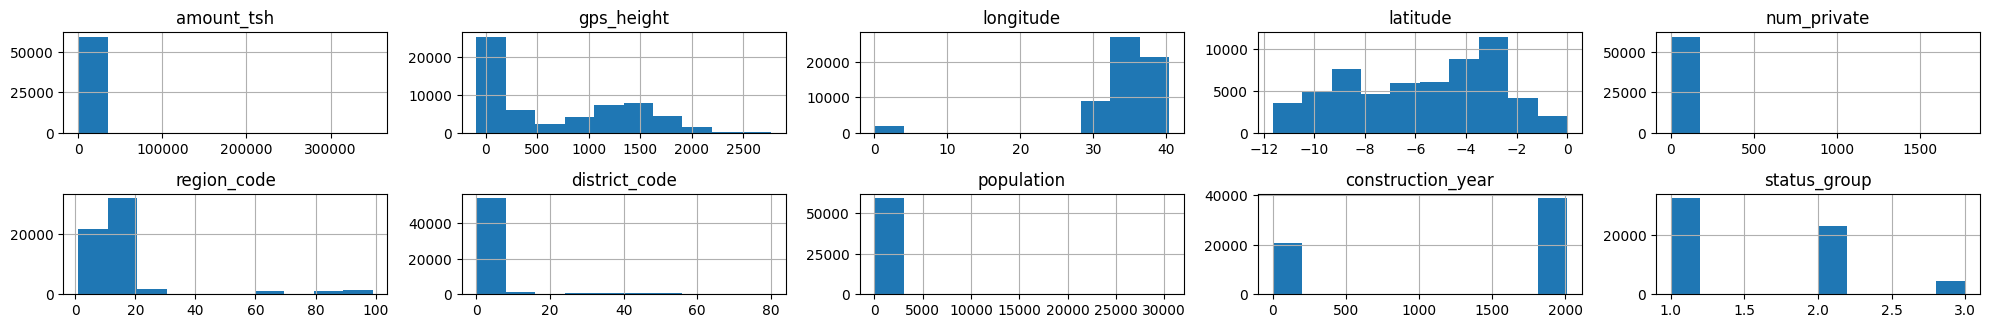

In [44]:
draw_histograms(df, df.select_dtypes(include=[np.number]).columns,5,5)

Se nota algo importante que no habiamos visto antes y es que hay variables con muchos 0, por ejemplo el 25% de los datos de construction_year esta en 0, lo cual deberian considerarse valores nulos, por la naturaleza de la variable, o sea deberia existir un año de la construcción.

Otras variables como population y amount_tsh tienen entre un 25% y 50% de valores en cero. Sin embargo estas variables por el momento no se van a intervenir. (¿Es posible que en realidad la población sea 0 alrededor de un punto de agua?, ¿Es posible que no haya agua disponible en esos puntos y por eso tenemos valores cero en amount_tsh?)

In [45]:
df[['construction_year', 'population', 'amount_tsh']].describe()

,construction_year,population,amount_tsh
count,59400.000000,59400.000000,59400.000000
mean,1300.652475,179.909983,317.650385
std,951.620547,471.482176,2997.574558
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1986.000000,25.000000,0.000000
75%,2004.000000,215.000000,20.000000
max,2013.000000,30500.000000,350000.000000


Para el caso de la variable construction_year, esta se va a eliminar ya que no se considera viable hacer una imputación de valores al 25% de la columna

In [46]:
df =  df.drop(columns=['construction_year'], axis=1)
X_test =  X_test.drop(columns=['construction_year'], axis=1)

Y las variables como district_code, region_code y num_private se van a pasar a categoricas

In [47]:
for i in ['district_code', 'region_code', 'num_private']:
    df[i] = df[i].astype('category')
    X_test[i] = X_test[i].astype('category')

Centrandonos unicamente en estas variables, en esta iteración se van a pasar por un proceso de escalado, considerando las diferentes magnitudes que hay entre estas variables

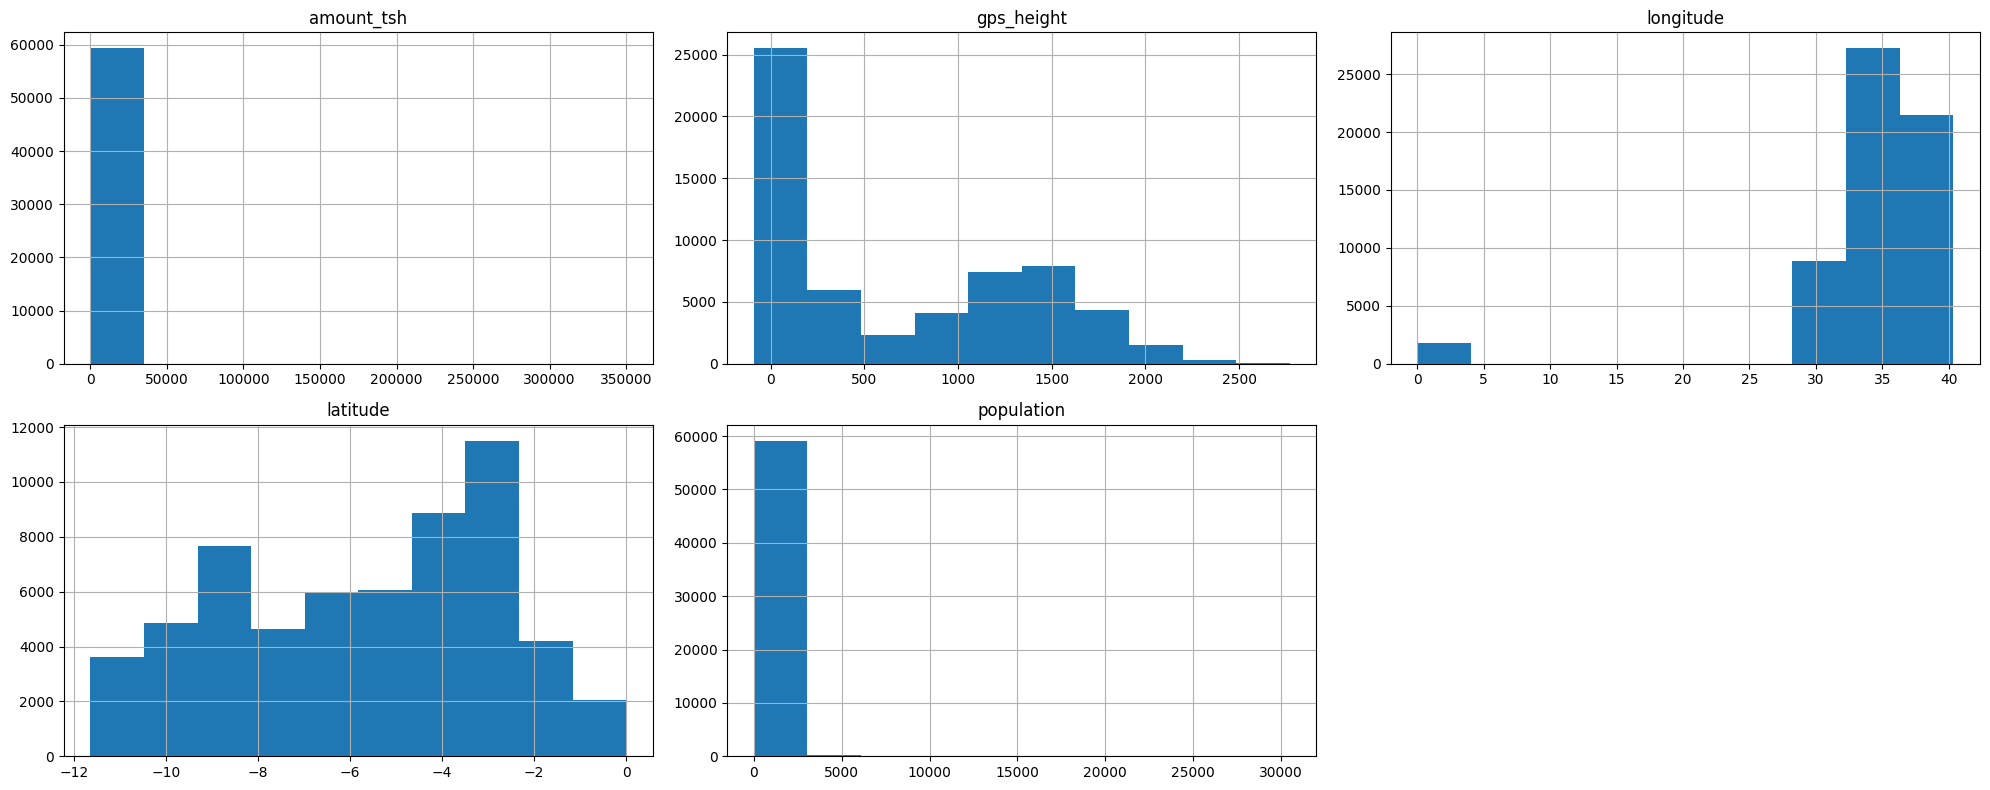

In [48]:
draw_histograms(df, ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population'],2,3)

Como prueba con el StandardScaler, vemos que cambian sus magnitudes en cada una de estas variables, esto unicamente es para la prueba, la idea es que el StandardScaler quede dentro de un pipeline

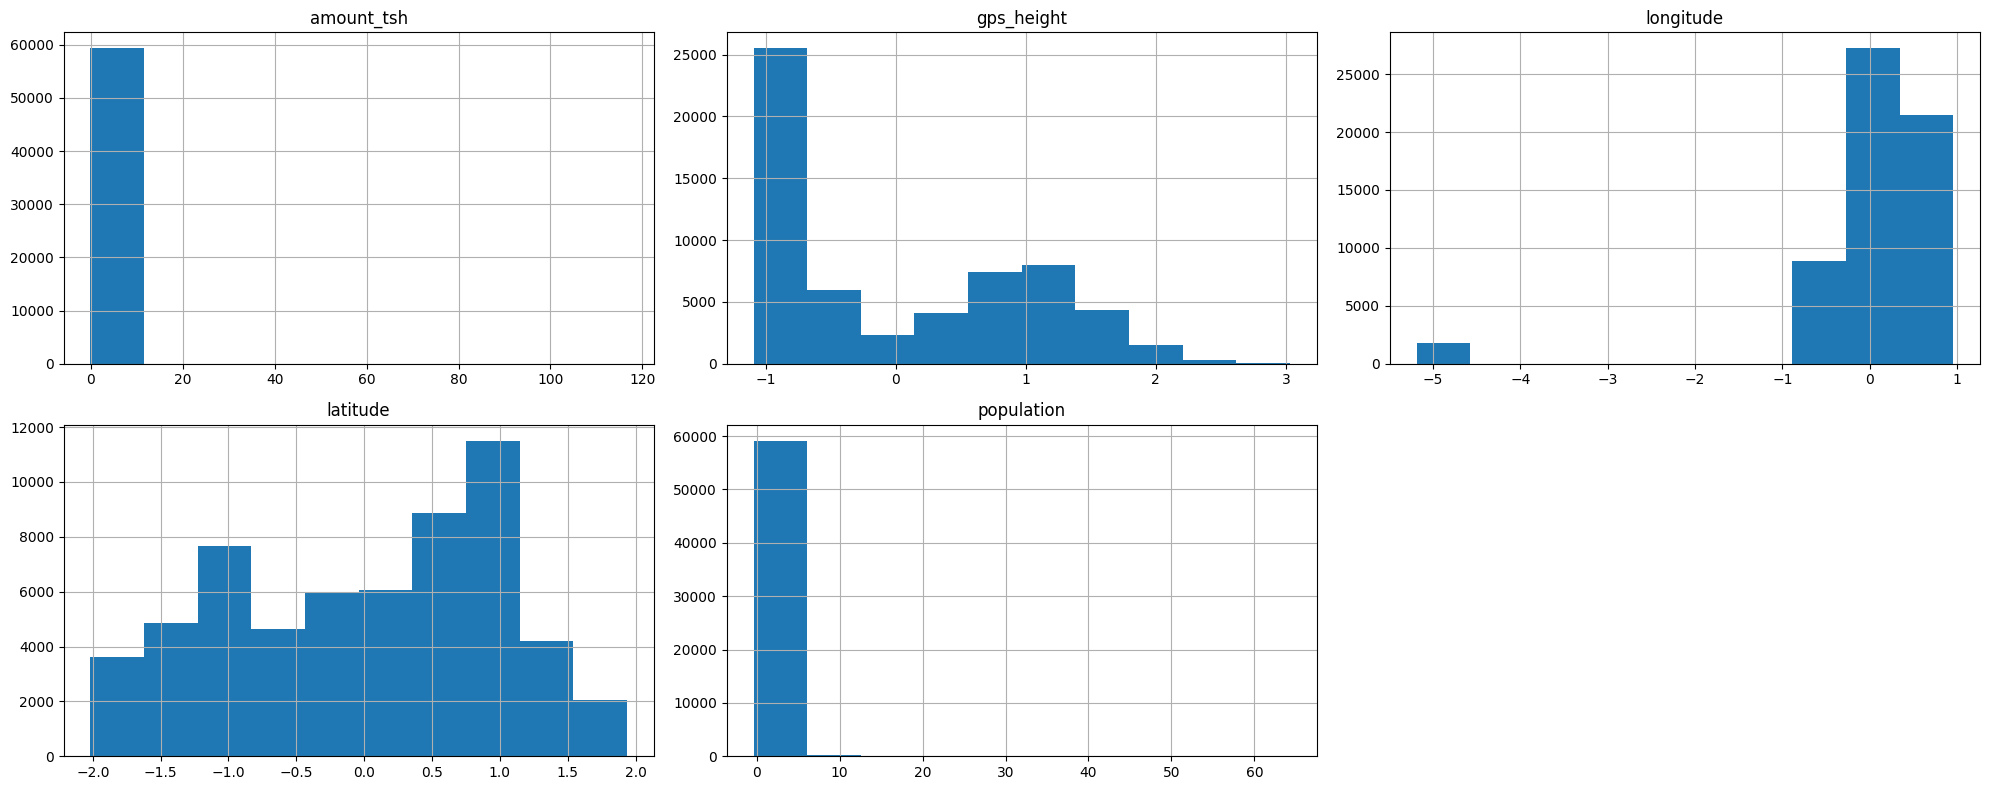

In [49]:
sc = StandardScaler()
cols = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population']
prueba_escalado = sc.fit_transform(df[cols])
prueba_escalado = pd.DataFrame(sc.fit_transform(df[cols]),columns=cols)
draw_histograms(prueba_escalado, ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population'],2,3)

Aqui creamos un pipeline para simplificar un poco el tema de la limpieza de las tablas, a diferencia de los vistos en clase, no implementamos el encoder dentro del pipeline, ya que por ejemplo, el LabelEncoder no lo permite dentro de la función (ya se intento), el frequency encoder se hace de forma manual, no es una función nativa de sklearn, y el onehot encoder no lo considero para la naturaleza de este dataset dada la gran cantidad de categorias (alta cardinalidad)

In [50]:
X = df.drop('status_group', axis=1)
y = df['status_group']

num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


Le hacemos el fit con la base de entrenamiento, y le pasamos el transform tanto a la base de entrenamiento como de test.

In [51]:
pipeline.fit(X)
X_clean = pipeline.transform(X)

X_test_clean = pipeline.transform(X_test)


feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

X_clean = pd.DataFrame(X_clean, columns=feature_names, index=X.index)
X_test_clean = pd.DataFrame(X_test_clean, columns=feature_names, index=X_test.index)

X_clean

,num__amount_tsh,num__gps_height,num__longitude,num__latitude,num__population,cat__funder,cat__installer,cat__wpt_name,cat__num_private,cat__basin,...,cat__payment_type,cat__water_quality,cat__quality_group,cat__quantity,cat__quantity_group,cat__source,cat__source_type,cat__source_class,cat__waterpoint_type,cat__waterpoint_type_group
0,1.895665,1.041252,0.131052,-1.408791,-0.150399,Roman,Roman,Shuleni,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,-0.10597,1.054237,0.09461,1.207934,0.21229,Grumeti,GRUMETI,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,-0.09763,0.025541,0.515158,0.639751,0.14866,Lottery Club,World vision,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,-0.10597,-0.584751,0.671308,-1.84972,-0.25857,Unicef,UNICEF,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,-0.10597,-0.9642,-0.448669,1.317271,-0.381587,Action In A,Artisan,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,-0.102634,0.781553,0.47087,0.832379,-0.116463,Germany Republi,CES,Area Three Namba 27,0,Pangani,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,1.461977,0.784439,0.178544,-1.142092,-0.262812,Cefa-njombe,Cefa,Kwa Yahona Kuvala,0,Rufiji,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,-0.10597,-0.9642,-0.009188,-1.033404,-0.381587,Government Of Tanzania,DWE,Mashine,0,Rufiji,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,-0.10597,-0.9642,0.271629,-0.22829,-0.381587,Malec,Musa,Mshoro,0,Rufiji,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


Ahora no tenemos valores nulos. Sin embargo, tambien se ve que ahora los valores que antes debian ser numericas ahora estan tipo object.

In [52]:
X_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   num__amount_tsh             59400 non-null  object
 1   num__gps_height             59400 non-null  object
 2   num__longitude              59400 non-null  object
 3   num__latitude               59400 non-null  object
 4   num__population             59400 non-null  object
 5   cat__funder                 59400 non-null  object
 6   cat__installer              59400 non-null  object
 7   cat__wpt_name               59400 non-null  object
 8   cat__num_private            59400 non-null  object
 9   cat__basin                  59400 non-null  object
 10  cat__subvillage             59400 non-null  object
 11  cat__region                 59400 non-null  object
 12  cat__region_code            59400 non-null  object
 13  cat__district_code          59400 non-null  ob

In [53]:
X_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   num__amount_tsh             14850 non-null  object
 1   num__gps_height             14850 non-null  object
 2   num__longitude              14850 non-null  object
 3   num__latitude               14850 non-null  object
 4   num__population             14850 non-null  object
 5   cat__funder                 14850 non-null  object
 6   cat__installer              14850 non-null  object
 7   cat__wpt_name               14850 non-null  object
 8   cat__num_private            14850 non-null  object
 9   cat__basin                  14850 non-null  object
 10  cat__subvillage             14850 non-null  object
 11  cat__region                 14850 non-null  object
 12  cat__region_code            14850 non-null  object
 13  cat__district_code          14850 non-null  ob

Volvemos a pasarlas a numericas

In [54]:
num_features = ["num__" + str(elemento) for elemento in num_features]

for i in num_features:
    X_clean[i] = X_clean[i].astype('float64')
    X_test_clean[i] = X_test_clean[i].astype('float64')

Se hace el encoder de la misma forma que se hizo anteriormente. Con el ligero cambio que en el frecuency, para el test rellena nuevamente valore nulos con 0, esto debido a que se noto que al parecer hay categorias en el test que no estan en el train, lo cual generaba valores nulos y para modelos como el de Naive Bayes no permitia luego pasar al predict.

In [55]:
le = LabelEncoder()

var_categoricas = X_clean.select_dtypes(include=['object', 'category']).columns.tolist()

for i in var_categoricas:
    if X_clean[i].nunique() > 10:
        frecuencias = X_clean[i].value_counts().to_dict()
        X_clean[f'{i}_encoded'] = X_clean[i].map(frecuencias)
        X_test_clean[f'{i}_encoded'] = X_test_clean[i].map(frecuencias).fillna(0)
    else:
        le.fit(X_clean[i])
        X_clean[f'{i}_encoded'] = le.transform(X_clean[i])
        X_test_clean[f'{i}_encoded'] = le.transform(X_test_clean[i])

    X_clean = X_clean.drop(columns=[i], axis=1)
    X_test_clean = X_test_clean.drop(columns=[i], axis=1)


Se realiza nuevamente la división estratificada.

In [56]:
X_train, X_test_1, y_train, y_test = train_test_split(X_clean,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = y)

In [57]:
model = RandomForestClassifier().fit(X_train,y_train)
y_pred = model.predict(X_test_1)
y_score = model.predict_proba(X_test_1)

Con este modelo, comparandolo con el anterior realizado, tenemos lo siguiente:

* Accuracy (Bajó): Paso de 0.81 a 0.80.
* Precision (Aumento): Paso de 0.80 a 0.79.
* Recall (Bajó): Paso de 0.81 a 0.80.
* F1 Score (Bajó): Paso de 0.80 a 0.79.
* AUC Macro Promedio (Bajó): Paso de 0.8961 a 0.8938

Exceptuando el Precision, las otras metricas bajaron ligeramente, sin embargo, las metricas de AUC por categoria de la variable objetivo, se mantuvieron iguales (functional: 0.90, non functional: 0.92, functional needs repair: 0.86)

Matriz de Confusión
[[5729  546  177]
 [ 965 3534   66]
 [ 430  141  292]]
Accuracy: 0.8042929292929293
Precision: 0.7981162396807397
Recall: 0.8042929292929293
F1 Score: 0.7978363859950353
AUC Macro Promedio: 0.8932


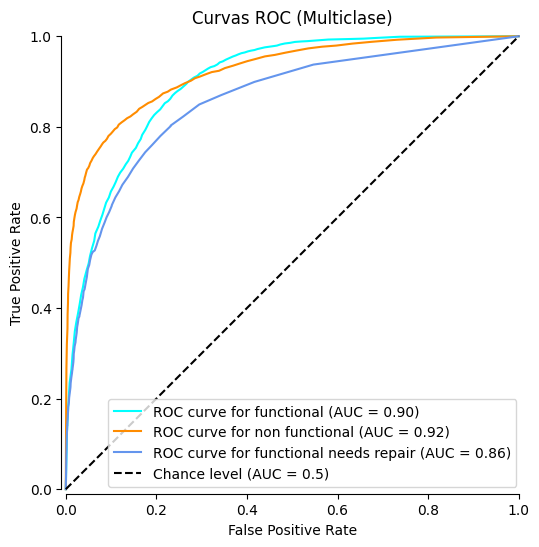

In [58]:
sacar_metricas(y_test, y_pred, y_train, y_score, n_classes)

Se va a utilizar esta función dada en clase para ver cuales variables son las que tienen mayor poder predictivo en nuestro modelo.

In [59]:
def plot_feature_importance(model, X_train):
    feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"])
    feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
    
    fig = px.bar(feat_importances, x=feat_importances.index, y='Importance', title='Feature Importances', labels={'x': 'Features', 'Importance': 'Importance'}, template='plotly_white')
    fig.show()

    return feat_importances

Las variables con mayor importancia son las de longitud y latitud. Tambien se nota que por ejemplo la variable amount_tsh tiene un valor de importancia del 0.018, lo cual ya empieza a ser bastante bajo, esto se podria deber a lo que habiamos visto antes, que el 50% de los datos son valores en 0.

In [60]:
feature_importances = plot_feature_importance(model, X_train)

Al probar con el GridSearchCV, el algoritmo define los parametros n_estimators en 200 y el max_depth en 24, que corresponderian al numero de arboles y a la profundidad maxima respectivamente.

In [61]:
grid_param = {
    'n_estimators': [50,200],
    'max_depth': [22,24]
}

model_grid = GridSearchCV(estimator=model,
                     param_grid=grid_param,
                     scoring='recall_macro',
                     cv=5,
                     n_jobs=-1)

model_grid.fit(X_train, y_train)
print(model_grid.best_params_)
print(model_grid.best_score_)

{'max_depth': 24, 'n_estimators': 200}
0.6602079187564801


In [62]:
y_pred = model_grid.predict(X_test_1)
y_score = model_grid.predict_proba(X_test_1)

Con este metodo, logramos nuevamente aumentar las metricas del Accuracy, Precision, Recall y F1 Score, aunque, nuevamente no logra superar al del primer modelo. Sin embargo, si logro superarlo en la metrica de AUC, esto debido a que paso de 0.86 a 0.87 en el AUC de la categoria de functional needs repair.

Matriz de Confusión
[[5806  497  149]
 [ 973 3527   65]
 [ 444  146  273]]
Accuracy: 0.8085858585858586
Precision: 0.8022830318143523
Recall: 0.8085858585858586
F1 Score: 0.8008572442783081
AUC Macro Promedio: 0.9001


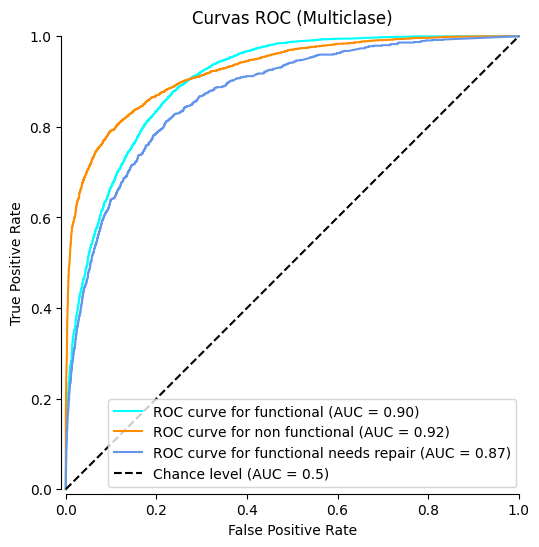

In [63]:
sacar_metricas(y_test, y_pred, y_train, y_score, n_classes)

In [64]:
y_pred = model_grid.predict(X_test_clean)
y_pred_df = pd.DataFrame(y_pred, columns=['status_group'], index=X_test_clean.index)
X_test_with_preds = pd.concat([X_test_clean, y_pred_df], axis=1)
X_test_with_preds['status_group'].replace((1,2,3),('functional','non functional','functional needs repair'),inplace=True)
X_test_with_preds['status_group']

0        non functional
1            functional
2            functional
3        non functional
4            functional
              ...      
14845    non functional
14846        functional
14847        functional
14848        functional
14849    non functional
Name: status_group, Length: 14850, dtype: object

In [65]:
X_test_id = X_test_original[['id']]
X_test_validacion = pd.concat([X_test_id, X_test_with_preds['status_group']], axis=1)
X_test_validacion

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


In [66]:
X_test_validacion.to_csv('SubmissionFormat2.csv', index=False)

Se obtuvo un score ligeramente menor al que se obtuvo anteriormente en el primer modelo.

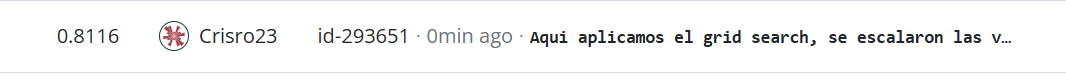

Todavia no hemos probado el decisiontree

In [67]:
model = DecisionTreeClassifier().fit(X_train,y_train)
y_pred = model.predict(X_test_1)
y_score = model.predict_proba(X_test_1)

Las metricas son notoriamente mas bajas que las obtenidas en los randomforest

Matriz de Confusión
[[5097  945  410]
 [ 962 3443  160]
 [ 371  179  313]]
Accuracy: 0.7452020202020202
Precision: 0.7459462921222146
Recall: 0.7452020202020202
F1 Score: 0.7455694709290286
AUC Macro Promedio: 0.7428


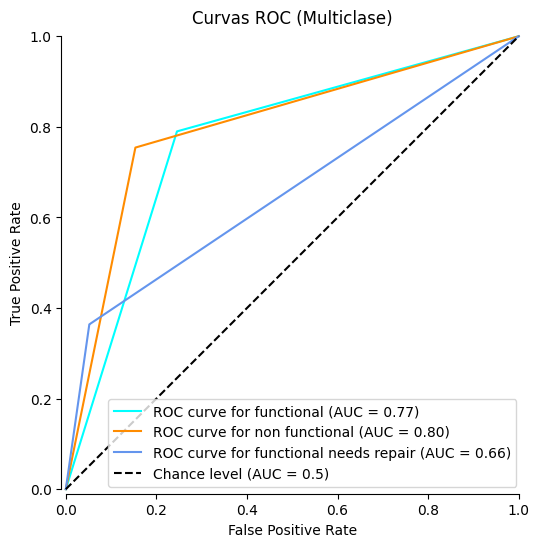

In [68]:
sacar_metricas(y_test, y_pred, y_train, y_score, n_classes)

In [69]:
y_pred = model.predict(X_test_clean)
y_pred_df = pd.DataFrame(y_pred, columns=['status_group'], index=X_test_clean.index)
X_test_with_preds = pd.concat([X_test_clean, y_pred_df], axis=1)
X_test_with_preds['status_group'].replace((1,2,3),('functional','non functional','functional needs repair'),inplace=True)
X_test_with_preds['status_group']

X_test_id = X_test_original[['id']]
X_test_validacion = pd.concat([X_test_id, X_test_with_preds['status_group']], axis=1)
X_test_validacion.to_csv('SubmissionFormat3.csv', index=False)

Aqui como era de esperar (considerando las metricas notariamente mas bajas en AUC, Accuracy, Precision, Recall y F1 Score) se obtuvo tambien un score mucho mas bajo en la plataforma.

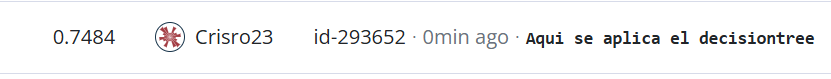

Se aplica un modelo de Gaussian Naive Bayes

In [70]:
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test_1)
y_score = model.predict_proba(X_test_1)

Hasta el momento es el modelo con peor rendimiento, aunque se reconoce que su valor de AUC en la categoria functional needs repair (0.70) es superior al obtenido en el modelo de decision tree (0.66)

Matriz de Confusión
[[2773 2547 1132]
 [ 909 3111  545]
 [ 212  258  393]]
Accuracy: 0.5283670033670034
Precision: 0.6026103815631211
Recall: 0.5283670033670034
F1 Score: 0.5387099891746017
AUC Macro Promedio: 0.6979


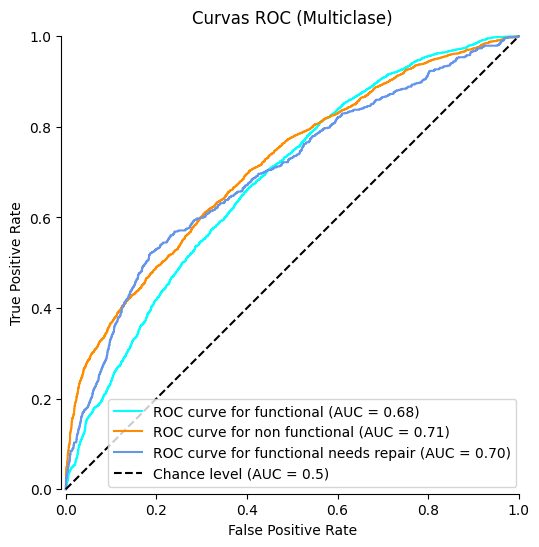

In [71]:
sacar_metricas(y_test, y_pred, y_train, y_score, n_classes)

In [72]:
X_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   num__amount_tsh                     14850 non-null  float64
 1   num__gps_height                     14850 non-null  float64
 2   num__longitude                      14850 non-null  float64
 3   num__latitude                       14850 non-null  float64
 4   num__population                     14850 non-null  float64
 5   cat__funder_encoded                 14850 non-null  float64
 6   cat__installer_encoded              14850 non-null  float64
 7   cat__wpt_name_encoded               14850 non-null  float64
 8   cat__num_private_encoded            14850 non-null  float64
 9   cat__basin_encoded                  14850 non-null  int64  
 10  cat__subvillage_encoded             14850 non-null  float64
 11  cat__region_encoded                 14850

In [73]:
y_pred = model.predict(X_test_clean)
y_pred_df = pd.DataFrame(y_pred, columns=['status_group'], index=X_test_clean.index)
X_test_with_preds = pd.concat([X_test_clean, y_pred_df], axis=1)
X_test_with_preds['status_group'].replace((1,2,3),('functional','non functional','functional needs repair'),inplace=True)
X_test_with_preds['status_group']

X_test_id = X_test_original[['id']]
X_test_validacion = pd.concat([X_test_id, X_test_with_preds['status_group']], axis=1)
X_test_validacion.to_csv('SubmissionFormat4.csv', index=False)

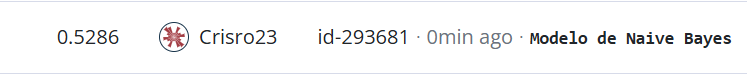

Vamos a probar el GradientBoostingClassifier

In [74]:
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test_1)
y_score = model.predict_proba(X_test_1)

Las metricas siguen estando por debajo del primer modelo RandomForest que se genero, pero se le reconoce a este modelo que obtuvo mejores resultados que los obtenidos en el DecisionTree y en el Naive Bayes

Matriz de Confusión
[[5920  496   36]
 [1564 2973   28]
 [ 599  129  135]]
Accuracy: 0.7599326599326599
Precision: 0.7645564324941562
Recall: 0.7599326599326599
F1 Score: 0.7407658174704123
AUC Macro Promedio: 0.8567


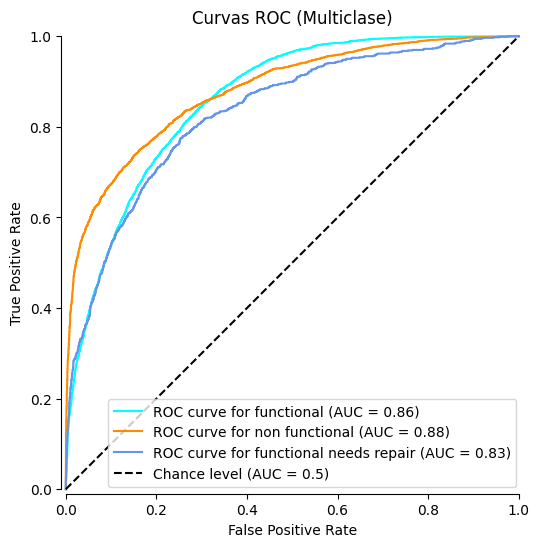

In [75]:
sacar_metricas(y_test, y_pred, y_train, y_score, n_classes)

In [76]:
y_pred = model.predict(X_test_clean)
y_pred_df = pd.DataFrame(y_pred, columns=['status_group'], index=X_test_clean.index)
X_test_with_preds = pd.concat([X_test_clean, y_pred_df], axis=1)
X_test_with_preds['status_group'].replace((1,2,3),('functional','non functional','functional needs repair'),inplace=True)
X_test_with_preds['status_group']

X_test_id = X_test_original[['id']]
X_test_validacion = pd.concat([X_test_id, X_test_with_preds['status_group']], axis=1)
X_test_validacion.to_csv('SubmissionFormat5.csv', index=False)

Tambien el score fue mejor que el obtenido en el Decisiontree y en el Naive Bayes

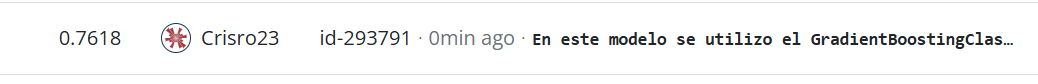

# Tercera Iteración

Vamos a volver a partir del dataset inicial, se le hacen ajustes que ya hemos visto antes. Volvemos a eliminar las variables que son muy similares con otras, tal cual como hicimos en la primera iteración.

In [77]:
df = df_original.copy()
X_test = X_test_original.copy()

df =  df.drop(columns=['recorded_by', 'date_recorded', 'construction_year','scheme_name', 'id'], axis=1)
X_test =  X_test.drop(columns=['recorded_by', 'date_recorded','construction_year', 'scheme_name', 'id'], axis=1)

df =  df.drop(columns=['extraction_type', 'extraction_type_group','payment', 'water_quality','quantity', 'source_class','source', 'waterpoint_type_group', 'management'], axis=1)
X_test =  X_test.drop(columns=['extraction_type', 'extraction_type_group','payment', 'water_quality','quantity', 'source_class','source', 'waterpoint_type_group', 'management'], axis=1)

df['status_group'].replace(('functional','non functional','functional needs repair'),
                            (1,2,3),inplace=True)


for i in df.select_dtypes(include=['object', 'category']).columns.tolist():
    if 'none' in df[i].unique() or 'None' in df[i].unique() or 'unknown' in df[i].unique() or 'Unknown' in df[i].unique():
        df = df.replace(['none', 'None', 'unknown', 'Unknown'], np.nan)

for i in X_test.select_dtypes(include=['object', 'category']).columns.tolist():
    if 'none' in X_test[i].unique() or 'None' in X_test[i].unique() or 'unknown' in X_test[i].unique() or 'Unknown' in X_test[i].unique():
        X_test = X_test.replace(['none', 'None', 'unknown', 'Unknown'], np.nan)

Para este caso vamos a probar normalizando las variables continuas con yeojohnson, no se probara con boxcox, ya que para esta se requiere de valores positivos, y dada la existencia de algunas variables con valores negativos, se considera que se ajusta más esta función.

Aqui tenemos la visualización de como quedaria por ejemplo la variable latitude, sin embargo, la idea es poder utilizar esto dentro de un pipeline, la función al ser de scipy no es directamente compatible con la sklearn, por lo que se usara la función de PowerTransformer https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html 

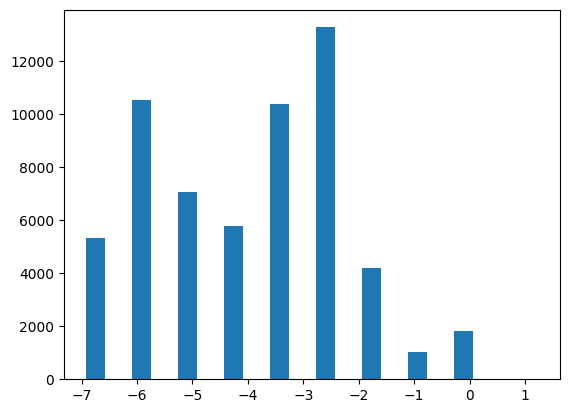

In [78]:
plt.hist(yeojohnson(df['latitude']))
plt.show()

In [79]:
X = df.drop('status_group', axis=1)
y = df['status_group']

num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('yeojohnson', PowerTransformer(method='yeo-johnson'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [80]:
pipeline.fit(X)
X_clean = pipeline.transform(X)

X_test_clean = pipeline.transform(X_test)


feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

X_clean = pd.DataFrame(X_clean, columns=feature_names, index=X.index)
X_test_clean = pd.DataFrame(X_test_clean, columns=feature_names, index=X_test.index)

num_features = ["num__" + str(elemento) for elemento in num_features]

for i in num_features:
    X_clean[i] = X_clean[i].astype('float64')
    X_test_clean[i] = X_test_clean[i].astype('float64')

In [81]:
le = LabelEncoder()

var_categoricas = X_clean.select_dtypes(include=['object', 'category']).columns.tolist()

for i in var_categoricas:
    if X_clean[i].nunique() > 10:
        frecuencias = X_clean[i].value_counts().to_dict()
        X_clean[f'{i}_encoded'] = X_clean[i].map(frecuencias)
        X_test_clean[f'{i}_encoded'] = X_test_clean[i].map(frecuencias).fillna(0)
    else:
        le.fit(X_clean[i])
        X_clean[f'{i}_encoded'] = le.transform(X_clean[i])
        X_test_clean[f'{i}_encoded'] = le.transform(X_test_clean[i])

    X_clean = X_clean.drop(columns=[i], axis=1)
    X_test_clean = X_test_clean.drop(columns=[i], axis=1)

In [82]:
X_train, X_test_1, y_train, y_test = train_test_split(X_clean,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = y)

Algo que se ha evidenciado en el valor AUC por cada categoria, es que la categoria 3 la de functional needs repair es la que menor puntuación obtiene, esto puede estar ligado al desbalanceo de las clases, ya que esta categoria solo corresponde al 7% de la base, por lo que trataremos de mejorar la metrica (y por tanto su predicción) por medio del SMOTE

In [83]:
y_train.value_counts(normalize=1)

status_group
1    0.543077
2    0.384238
3    0.072685
Name: proportion, dtype: float64

Se modifica un poco el parametro sampling_strategy, ya que para una variable multiclase no se puede dejar exactamente igual al codigo mostrado en los recursos del curso

In [91]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '2': {}".format(sum(y_train==2)))
print("Before OverSampling, counts of label '3': {}".format(sum(y_train==3)))


sm = SMOTE(random_state=2, sampling_strategy="not majority")


X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res==2)))
print("After OverSampling, counts of label '3': {}".format(sum(y_train_res==3)))

Before OverSampling, counts of label '1': 25807
Before OverSampling, counts of label '2': 18259
Before OverSampling, counts of label '3': 3454
After OverSampling, the shape of train_X: (77421, 26)
After OverSampling, the shape of train_y: (77421,) 

After OverSampling, counts of label '1': 25807
After OverSampling, counts of label '2': 25807
After OverSampling, counts of label '3': 25807


Se aplica la siguiente automatización para generar varios modelos, se incluyo el GradientBoosting, sin embargo, despues de varias horas, el codigo seguia y seguia corriendo y finalmente nunca mostro los resultados para ese modelo.

In [103]:
models = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'GaussianNB': GaussianNB()
    }

param_grid = {
    'DecisionTree': {
        'classifier__max_depth': [3, 5, 10, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'RandomForest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 10, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'GaussianNB': {}
}

best_models = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('classifier', model)
    ])
    
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_res, y_train_res)
    
    best_models[name] = grid_search.best_estimator_
    print(f"Mejor modelo para {name}: {grid_search.best_params_}, Mejor Score: {grid_search.best_score_}")


Mejor modelo para DecisionTree: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}, Mejor Score: 0.8061642624294458
Mejor modelo para RandomForest: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}, Mejor Score: 0.8651405377509273
Mejor modelo para GaussianNB: {}, Mejor Score: 0.516927038416107


En este caso solo obtenemos los resultados para el DecisionTree, RandomForest y el GaussianNB (que en este caso solo fue para ponerlo dentro de la iteración, ya que a este no se le deben ajustar parametros)

Mejor modelo para DecisionTree: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}, Mejor Score: 0.8061642624294458
Mejor modelo para RandomForest: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}, Mejor Score: 0.8651405377509273
Mejor modelo para GaussianNB: {}, Mejor Score: 0.516927038416107

In [109]:
model = DecisionTreeClassifier(max_depth=None,min_samples_leaf=1, min_samples_split=2).fit(X_train_res,y_train_res)
y_pred = model.predict(X_test_1)
y_score = model.predict_proba(X_test_1)

Comparado con el anterior DecisionTree logramos mejorar algunas metricas (aunque no todas), y con ello tambien el AUC de la categoria que teniamos desbalanceada.

Matriz de Confusión
[[4939  996  517]
 [ 890 3448  227]
 [ 329  161  373]]
Accuracy: 0.7373737373737373
Precision: 0.747561720661101
Recall: 0.7373737373737373
F1 Score: 0.7417729039552989
AUC Macro Promedio: 0.7505


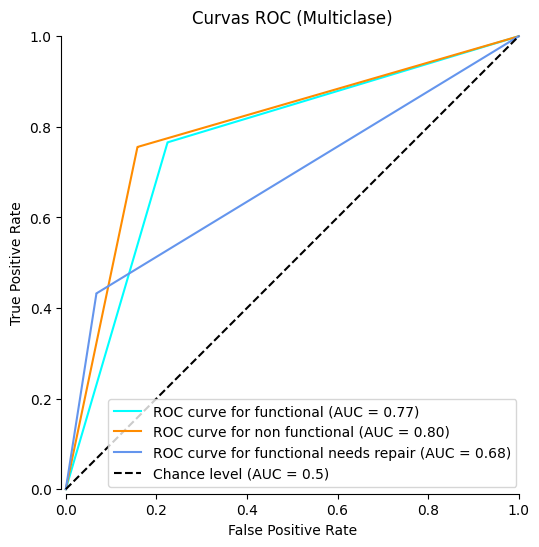

In [110]:
sacar_metricas(y_test, y_pred, y_train, y_score, n_classes)

In [111]:
y_pred = model.predict(X_test_clean)
y_pred_df = pd.DataFrame(y_pred, columns=['status_group'], index=X_test_clean.index)
X_test_with_preds = pd.concat([X_test_clean, y_pred_df], axis=1)
X_test_with_preds['status_group'].replace((1,2,3),('functional','non functional','functional needs repair'),inplace=True)
X_test_with_preds['status_group']

X_test_id = X_test_original[['id']]
X_test_validacion = pd.concat([X_test_id, X_test_with_preds['status_group']], axis=1)
X_test_validacion.to_csv('SubmissionFormat6.csv', index=False)

No mejoro el score al obtenido en el anterior DecisionTree.

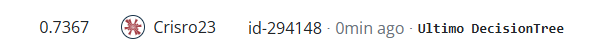

In [112]:
model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200).fit(X_train_res,y_train_res)
y_pred = model.predict(X_test_1)
y_score = model.predict_proba(X_test_1)

Las metricas del RandomForest presentan ligeras variaciones en metricas como Accuracy, Precision, Recall y F1 Score, sin embargo, los valores AUC por categoria se encuentran practicamente igual, exceptuando la de la primera categoria.

Matriz de Confusión
[[5424  616  412]
 [ 847 3573  145]
 [ 346  132  385]]
Accuracy: 0.7897306397306397
Precision: 0.792611306302546
Recall: 0.7897306397306397
F1 Score: 0.7908064572595546
AUC Macro Promedio: 0.8937


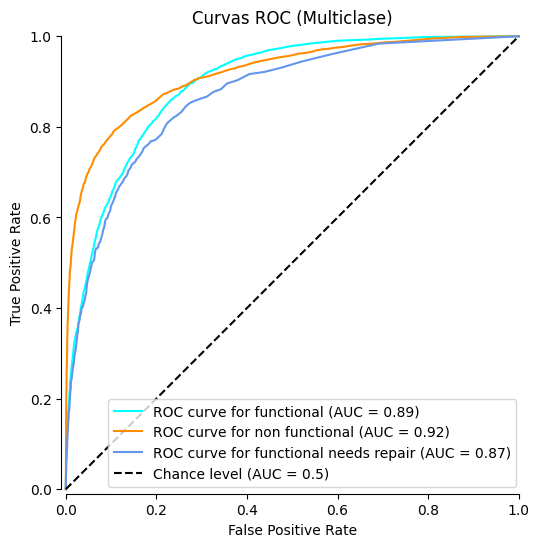

In [113]:
sacar_metricas(y_test, y_pred, y_train, y_score, n_classes)

In [114]:
y_pred = model.predict(X_test_clean)
y_pred_df = pd.DataFrame(y_pred, columns=['status_group'], index=X_test_clean.index)
X_test_with_preds = pd.concat([X_test_clean, y_pred_df], axis=1)
X_test_with_preds['status_group'].replace((1,2,3),('functional','non functional','functional needs repair'),inplace=True)
X_test_with_preds['status_group']

X_test_id = X_test_original[['id']]
X_test_validacion = pd.concat([X_test_id, X_test_with_preds['status_group']], axis=1)
X_test_validacion.to_csv('SubmissionFormat7.csv', index=False)

No mejoro el score a los obtenidos en los anteriores RandomForest.

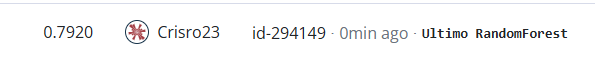

In [115]:
model = GaussianNB()
model.fit(X_train_res,y_train_res)
y_pred = model.predict(X_test_1)
y_score = model.predict_proba(X_test_1)

Con el modelo GaussianNB no obtuvimos mejoras comparadas con el anterior modelo.

Matriz de Confusión
[[2177 1339 2936]
 [ 765 2265 1535]
 [ 131  159  573]]
Accuracy: 0.42213804713804715
Precision: 0.624288774188611
Recall: 0.42213804713804715
F1 Score: 0.471367299110661
AUC Macro Promedio: 0.6817


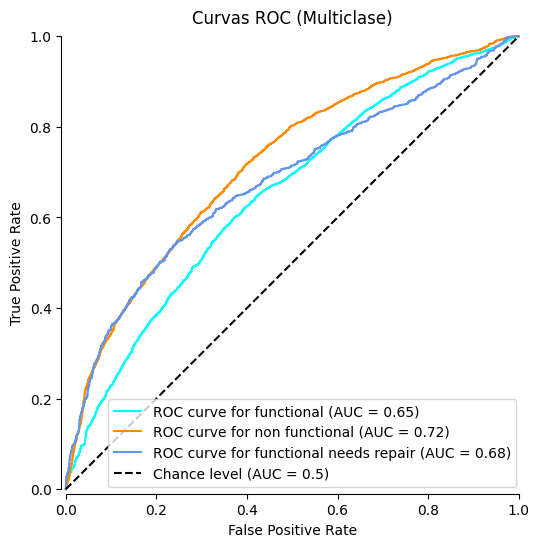

In [116]:
sacar_metricas(y_test, y_pred, y_train, y_score, n_classes)

In [117]:
y_pred = model.predict(X_test_clean)
y_pred_df = pd.DataFrame(y_pred, columns=['status_group'], index=X_test_clean.index)
X_test_with_preds = pd.concat([X_test_clean, y_pred_df], axis=1)
X_test_with_preds['status_group'].replace((1,2,3),('functional','non functional','functional needs repair'),inplace=True)
X_test_with_preds['status_group']

X_test_id = X_test_original[['id']]
X_test_validacion = pd.concat([X_test_id, X_test_with_preds['status_group']], axis=1)
X_test_validacion.to_csv('SubmissionFormat8.csv', index=False)

El peor score obtenido durante todo el experimento.

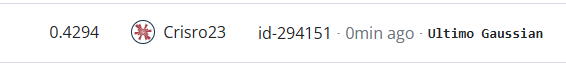

# Conclusiones

1. Preprocesamiento de datos

   * Fue necesario identificar entre variables numéricas y categóricas para aplicar transformaciones adecuadas (imputación con medias, escalado con StandardScaler y codificación con OneHotEncoder).
   * Dada las clases desbalanceadas, se aplico el metodo SMOTE para intentar mejorar la predicción de las variables con menor participación en la base.

2. Modelos evaluados

   * Se experimentaron con diferentes modelos, como con el DecisionTree, RandomForest, Gaussian Naive Bayes y Gradient Boosting.
   * Los modelos basados en arboles (Random Forest, Decision Tree y Gradient Boosting) tuvieron un mejor desempeño en comparación con GaussianNB.

3. Optimización de hiperparámetros

   * A través de GridSearchCV se ajustaron diferentes parámetros (como profundidad de los árboles y número de estimadores).
   * Esto permitió obtener modelos más robustos y evitar el sobreajuste.

4. Métricas de evaluación

   * Los mejores modelos lograron un equilibrio aceptable entre recall y precisión, con valores de F1-score superiores en Random Forest y Gradient Boosting.

5. Conclusión general

   * El modelo más prometedor fue Random Forest / Gradient Boosting, que ofrece un buen equilibrio entre precisión y capacidad de generalización.
   * Y así mismo, los peores modelos resultaron de los de Gaussian Naive Bayes.